Camera1: alpha= 0.014658195519944836 Delta_y= [-0.09848463]
Camera2: alpha= 0.2906649264661405 Delta_y= [1.08596081]
Dx = [-4.74685569]
(501, 1200)


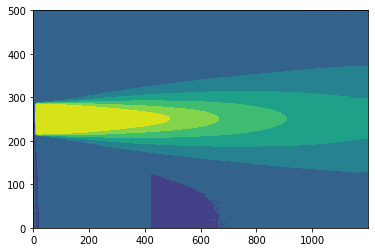

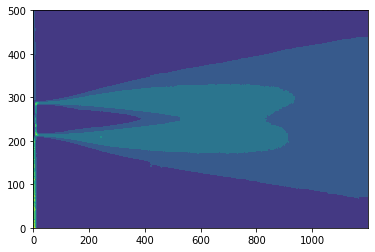

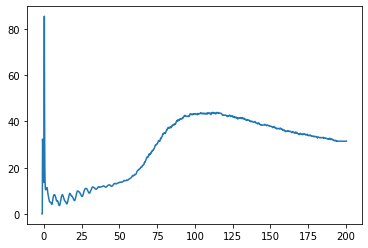

In [2]:
#!/usr/local/bin/python3
#
# Stitching des fichiers moyennes de davis
#
# usage :./main_stitch_meanPIV.py --fin ../DATA_Davis/Ma1080
#                                 --fout DATA_Stitched
#                                 --Mj 1.080
#
#
##########################################################

import argparse

import importlib
import pivFunctions
importlib.reload(pivFunctions)

from scipy.io  import loadmat
import numpy as np

from glob import glob
import re

##############################################@@@@@@@@
def Mj_NPR(NPR):
    g=1.4
    return (2.0/(g-1)*(NPR**((g-1)/g)-1))**0.5

def Uj_Mj(Mj,T0=293):
    g=1.4
    R=287
    return np.sqrt(g*R*T0/(1. + (g-1.)/2.*Mj**2))*Mj

#################################################@@@@


#== Reorganize the mean PIV fields to get the interpolation grid
folderAvg = '../DATA_Davis/Ma1080/'
stitchGrid_dict = pivFunctions.create_StitchGrid(folderAvg+'/B00001_AvgV.vc7',1200,501)
dataM = pivFunctions.stitchPIV(folderAvg+'/B00001_AvgV.vc7',stitchGrid_dict)
dataRMS= pivFunctions.stitchPIV(folderAvg+'/B00002_StdDevV.vc7',stitchGrid_dict)

print(dataM['U'].shape)


## === Plot 
plt.figure()
plt.contourf(dataM['U'][:,:])

plt.figure()
plt.contourf(dataRMS['U'][:,:])

plt.figure()
plt.plot(dataM['X'],dataRMS['U'][250,:])